<a href="https://colab.research.google.com/github/AlbionKransiqi/Capstone/blob/main/YoloV3_model_and_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv3 Implementation

## Data Pre-processing 

In [1]:
from google.colab import drive
import os
import sys
from glob import glob
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import drive


drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Directory of images to run detection on
D2S_DATSET_DIR = '/content/gdrive/My Drive/Colab Notebooks/d2s_data'

annotations= os.path.join(D2S_DATSET_DIR, 'd2s_annotations_v1/D2S_validation.json')

In [3]:
import time
from pycocotools import coco
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

from PIL import Image

def show(id):
  imgid= coco.getImgIds(id)
  #print imgid
  Imgs = coco.loadImgs(id)[0]
  #print Imgs
  imagefile = "/home/dl-linux/coco/images/"
  imageurl = imagefile + Imgs['file_name']
  #print imageurl
  I = io.imread(imageurl)

  plt.imshow(I)
  plt.show()

  return Imgs, I ,Imgs['file_name']

**NOTE:** names that will be printed after this code cell need to be placed in coco.names file

In [5]:
dataDir='..'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)


annFile = "/content/gdrive/MyDrive/Colab Notebooks/data/d2s_annotations_v1/D2S_validation.json"


coco=coco.COCO(annFile)

#print coco.loadAnns(coco.getAnnIds())

print(len(coco.getCatIds()))
print(coco.getAnnIds()[0])

cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
for i in range(len(nms)):
  print(nms[i])


loading annotations into memory...
Done (t=2.57s)
creating index...
index created!
60
800001
adelholzener_alpenquelle_classic_075
adelholzener_alpenquelle_naturell_075
adelholzener_classic_bio_apfelschorle_02
adelholzener_classic_naturell_02
adelholzener_gourmet_mineralwasser_02
augustiner_lagerbraeu_hell_05
augustiner_weissbier_05
coca_cola_05
coca_cola_light_05
suntory_gokuri_limonade
tegernseer_hell_03
corny_nussvoll
corny_nussvoll_single
corny_schoko_banane
corny_schoko_banane_single
dr_oetker_vitalis_knuspermuesli_klassisch
koelln_muesli_fruechte
koelln_muesli_schoko
caona_kakaohaltiges_getraenkepulver
cocoba_fruehstueckskakao_mit_honig
cafe_wunderbar_espresso
douwe_egberts_professional_kaffee_gemahlen
gepa_bio_caffe_crema
gepa_italienischer_bio_espresso
apple_braeburn_bundle
apple_golden_delicious
apple_granny_smith
apple_roter_boskoop
avocado
banana_bundle
banana_single
clementine
clementine_single
grapes_green_sugraone_seedless
grapes_sweet_celebration_seedless
kiwi
orange_sing

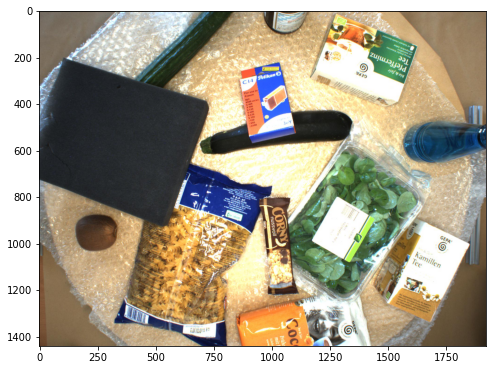

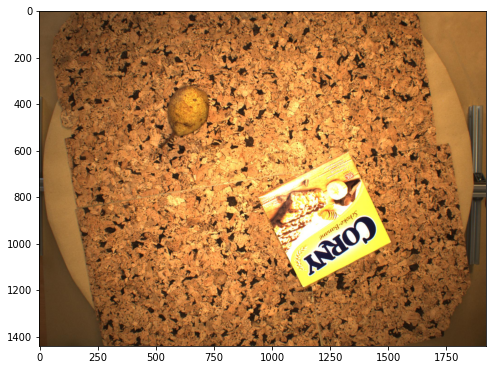

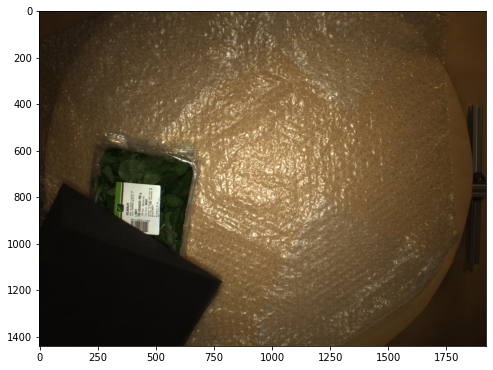

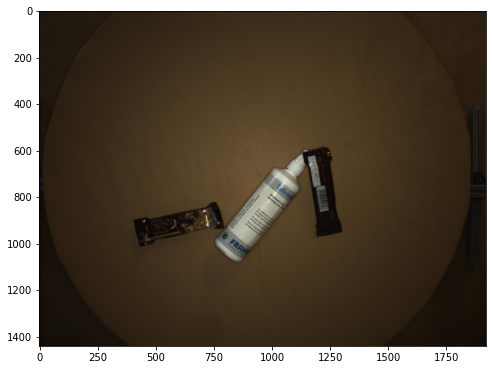

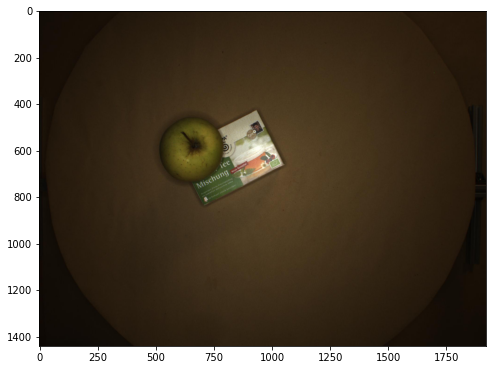

In [8]:
images = glob("/content/gdrive/My Drive/Colab Notebooks/data/images/*")

for i in range(1,9000,2000):
    image = Image.open(images[i])
    imgplot = plt.imshow(image)
    plt.show()

**Extracting the box coordinates from json files into txt**

In [10]:
I_w = 1920.0
I_h = 1440.0
for i in range(len(coco.getAnnIds())):
  image_id =  coco.loadAnns(ids=coco.getAnnIds()[i])[0]['image_id']

  x1 = float(coco.loadAnns(ids=coco.getAnnIds()[i])[0]['bbox'][0])
  y1 = float(coco.loadAnns(ids=coco.getAnnIds()[i])[0]['bbox'][1])
  w1 = float(coco.loadAnns(ids=coco.getAnnIds()[i])[0]['bbox'][2])
  h1 = float(coco.loadAnns(ids=coco.getAnnIds()[i])[0]['bbox'][3])
  #print x1,y1,w1,h1
  x = ((x1 + x1 + w1)/2)/I_w
  y = ((y1 + y1 + h1)/2)/I_h
  w = w1 / I_w
  h = h1 / I_h

  category_id = coco.loadAnns(ids=coco.getAnnIds()[i])[0]['category_id']

  if int(image_id)<100000:
    txt = "/content/gdrive/MyDrive/Colab Notebooks/darknet/data/D2S/lables/" + "D2S_" + "%06d.txt" %image_id
  elif int(image_id)<100000000:
    txt = "/content/gdrive/MyDrive/Colab Notebooks/darknet/data/D2S/labels/" + "D2S_" + "%08d.txt" %image_id

  with open(txt,'a') as file:
    file.write(str(category_id-1) + ' ' + str(x) + ' ' + str(y) + ' ' + str(w) + ' ' + str(h) +  '\n' )
  file.close()

**This repositories need to be cloned**

In [11]:
os.chdir("/content/gdrive/MyDrive/Colab Notebooks")

In [ ]:
#!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 14.34 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [ ]:
#!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5940, done.
remote: Total 5940 (delta 0), reused 0 (delta 0), pack-reused 5940
Receiving objects: 100% (5940/5940), 6.37 MiB | 6.39 MiB/s, done.
Resolving deltas: 100% (3925/3925), done.
Checking out files: 100% (979/979), done.


In [12]:
os.chdir("/content/gdrive/MyDrive/Colab Notebooks/darknet/")

!wget https://pjreddie.com/media/files/darknet53.conv.74

--2021-12-05 21:27:21--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74.1’

darknet53.conv.74.1 100%[===================>] 154.96M  21.7MB/s    in 8.0s    

2021-12-05 21:27:30 (19.3 MB/s) - ‘darknet53.conv.74.1’ saved [162482580/162482580]



Data has been placed inside darknet/data/D2S and within D2S a new folder named labels was created

In [14]:
folder_path = '/content/gdrive/MyDrive/Colab Notebooks/darknet/data/D2S/lables'

file = os.listdir(folder_path)

Creating a file with the paths to training images

In [15]:
for i in range(len(file)):
  current = file[i][:-4]
  with open('/content/gdrive/MyDrive/Colab Notebooks/darknet/data/D2S/train_file_list.txt','a') as file1:
    file1.write('/content/gdrive/MyDrive/Colab Notebooks/darknet/data/D2S/images/' + current + '.jpg' + '\n')
  file1.close()\

In [16]:
os.chdir("/content/gdrive/MyDrive/Colab Notebooks/darknet/cfg/")

!cp yolov3.cfg yolov3_custom_train.cfg
!cp voc.data d2s.data

**Making some modification in the model configurations**

In [17]:
# setup training configuration

with open("/content/gdrive/MyDrive/Colab Notebooks/darknet/cfg/yolov3_custom_train.cfg") as f:
    lines = f.readlines()
lines[7] = "width=416\n"
lines[8] = "height=416\n"
lines[19] = "max_batches=6000\n"
lines[21] = "steps=5400\n"
lines[602] = "filters=195\n" # computed as filters=(classes+5)*3
lines[688] = "filters=195\n"
lines[775] = "filters=195\n"
lines[609] = "classes=60\n"
lines[695] = "classes=60\n"
lines[782] = "classes=60\n"
with open("/content/gdrive/MyDrive/Colab Notebooks/darknet/cfg/yolov3_custom_train.cfg", "w") as f:
    f.writelines(lines)


with open("/content/gdrive/MyDrive/Colab Notebooks/darknet/cfg/d2s.data") as f:
    lines = f.readlines()
lines[0] = "classes= 60\n"
lines[1] = "train= data/D2S/train_file_list.txt\n"
lines[2] = "valid= data/D2S/train_file_list.txt\n"
lines[3] = "names= data/coco.names\n"
with open("/content/gdrive/MyDrive/Colab Notebooks/darknet/cfg/d2s.data", "w") as f:
    f.writelines(lines)

In [ ]:
os.chdir("/content/gdrive/MyDrive/Colab Notebooks/darknet/")

!make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

**Training the model**

In [ ]:
!./darknet detector train cfg/d2s.data cfg/yolov3_custom_train.cfg darknet53.conv.74

yolov3_custom_train
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32  0.177 BFLOPs
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    4 res    1                 208 x 208 x  64   ->   208 x 208 x  64
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    8 res    5                 104 x 104 x 128   ->   104 x 104 x 128
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
   11 res    8   